In [63]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

train_df = pd.read_csv('data/train.csv').drop(columns='id')
origin_df = pd.read_csv('data/trainn.csv').drop(columns='id')

In [47]:

# Encoder our prognosis labels as integers for easier decoding later
enc = OrdinalEncoder()
train_df['prognosis'] = enc.fit_transform(train_df[['prognosis']])

In [159]:
yf_deng_mala = train_df.query("prognosis == 'Yellow_fever' or prognosis == 'Dengue' or prognosis == 'Malaria'")

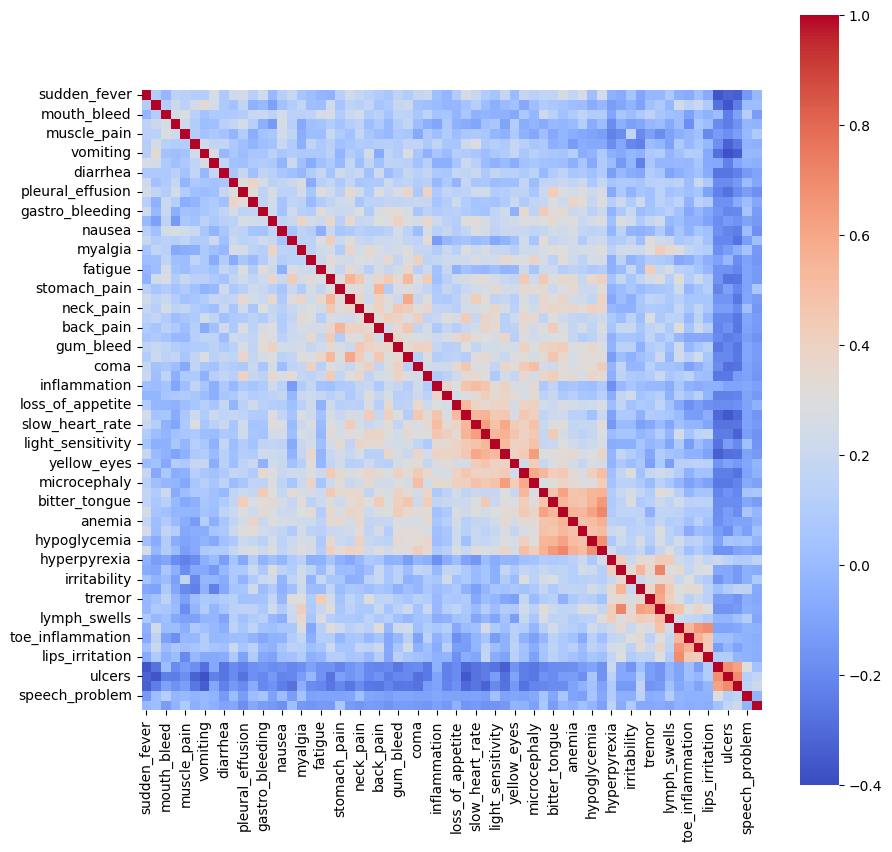

In [164]:
# Calculate the correlation matrix
yfm_corr = yf_deng_mala.drop(columns='prognosis').corr()

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heatmap
sns.heatmap(yfm_corr, cmap='coolwarm', vmin=-0.4, vmax=1, ax=ax, square=True)

# Show the plot
plt.show()


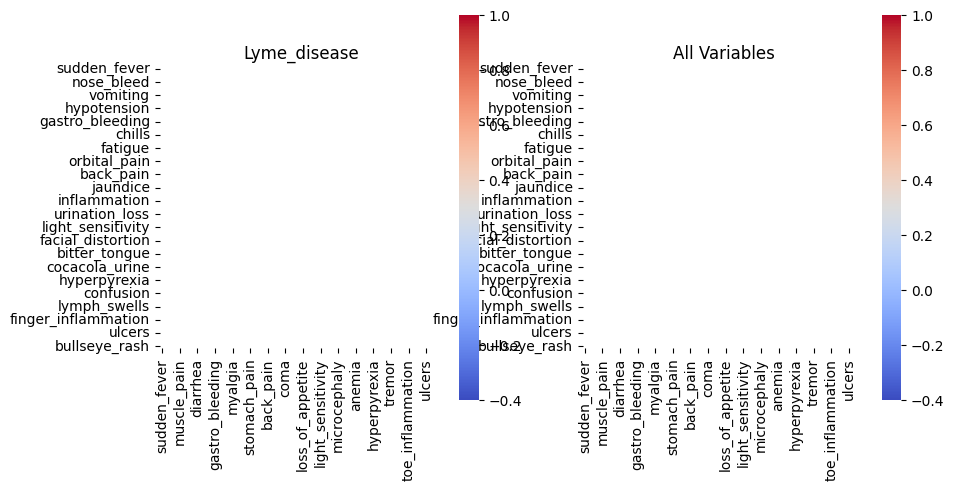

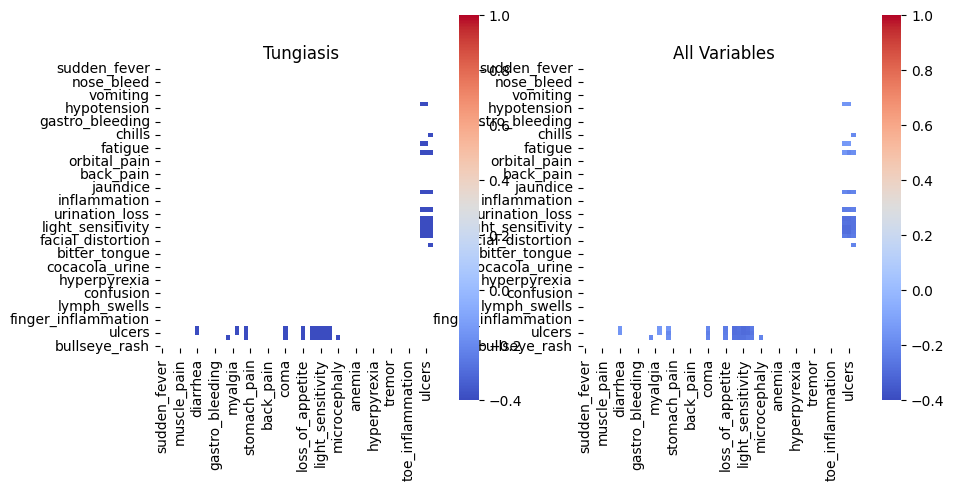

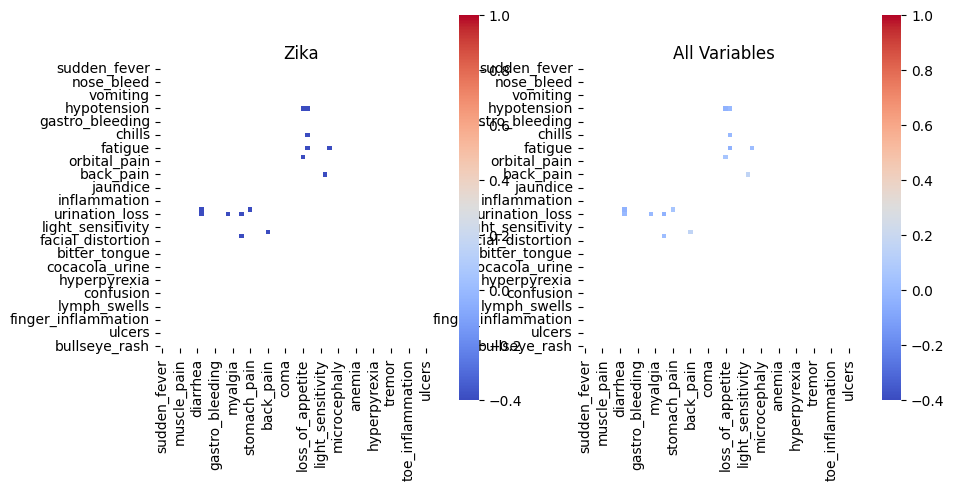

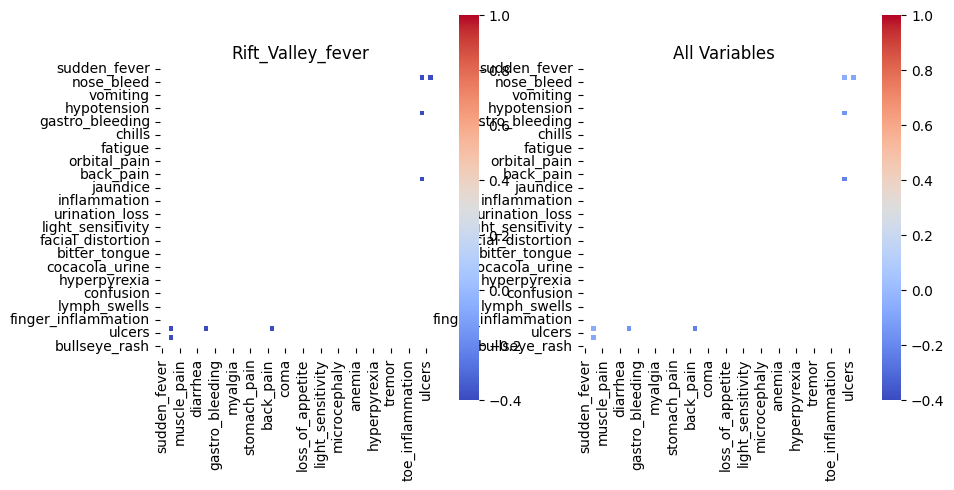

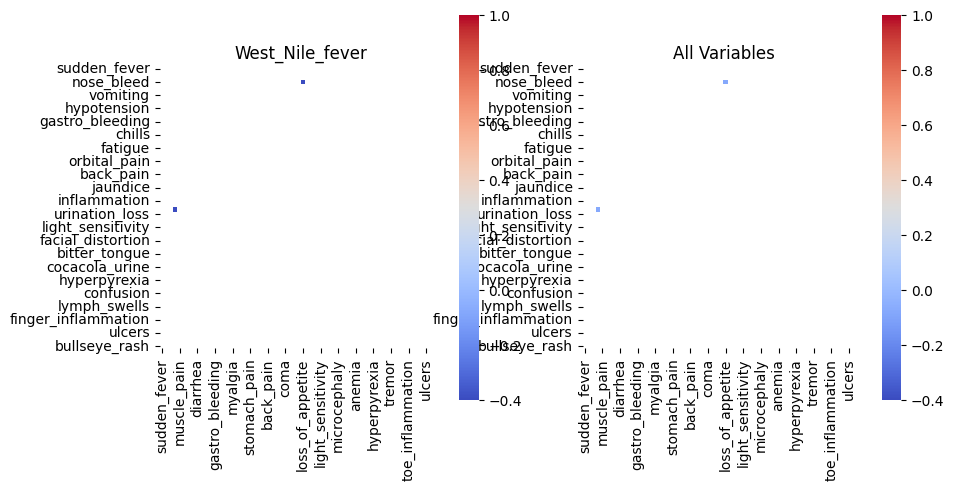

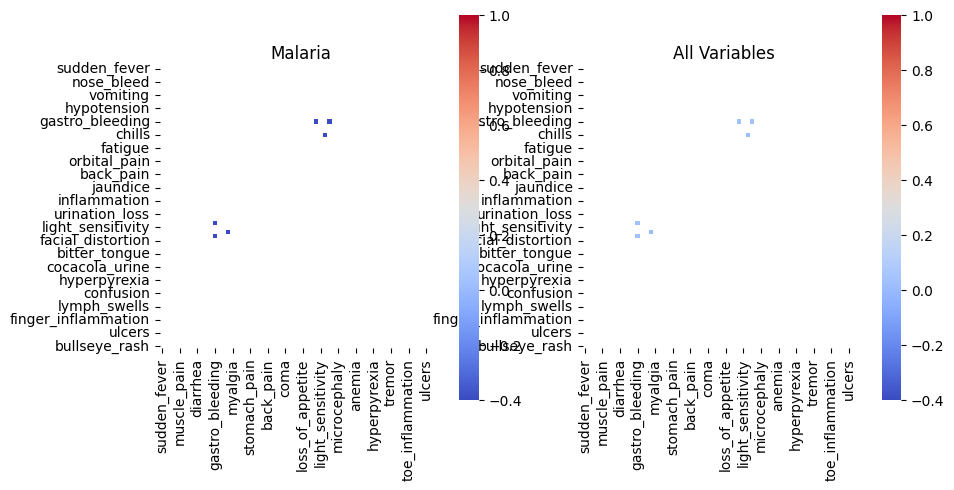

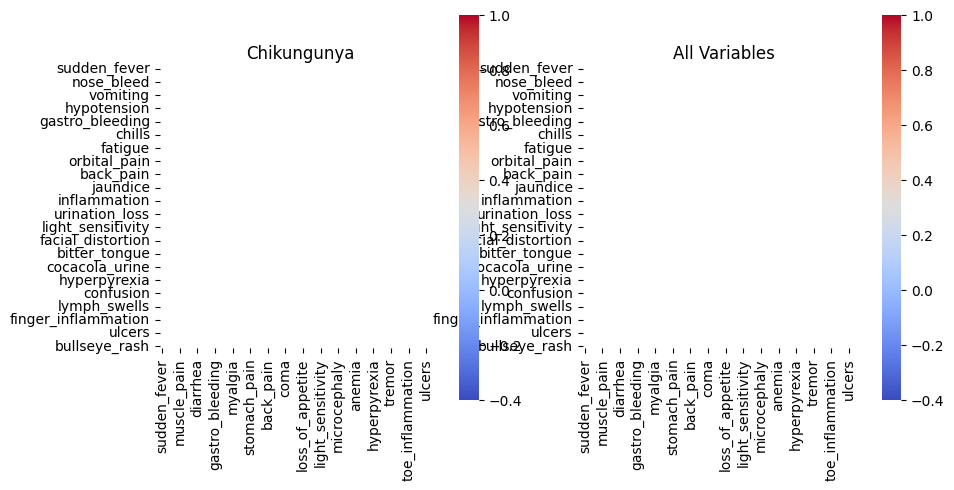

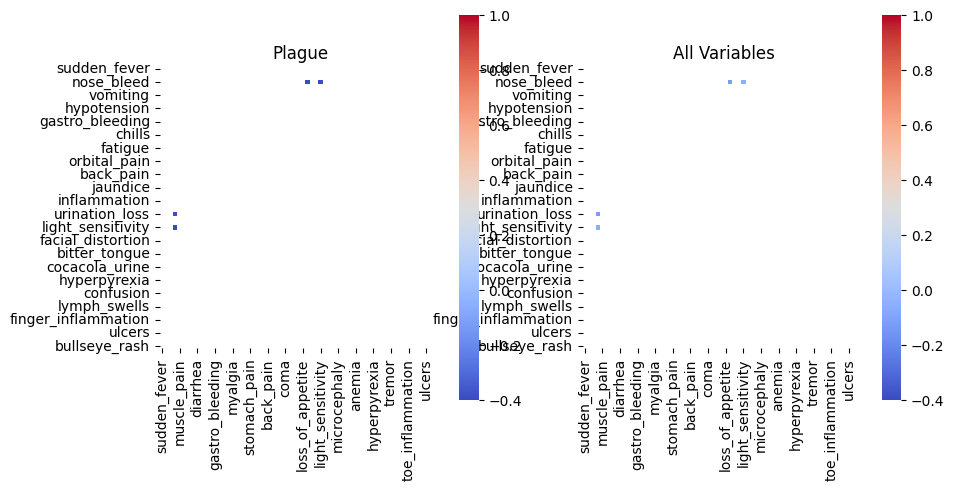

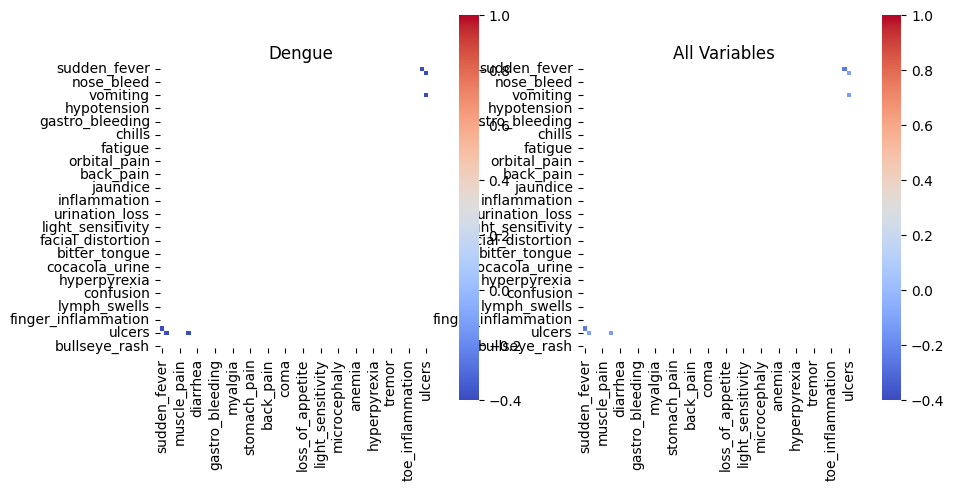

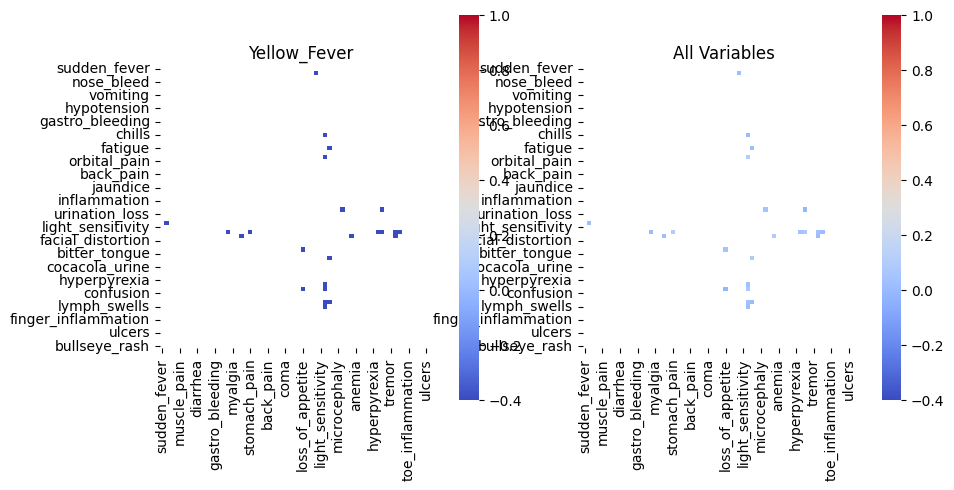

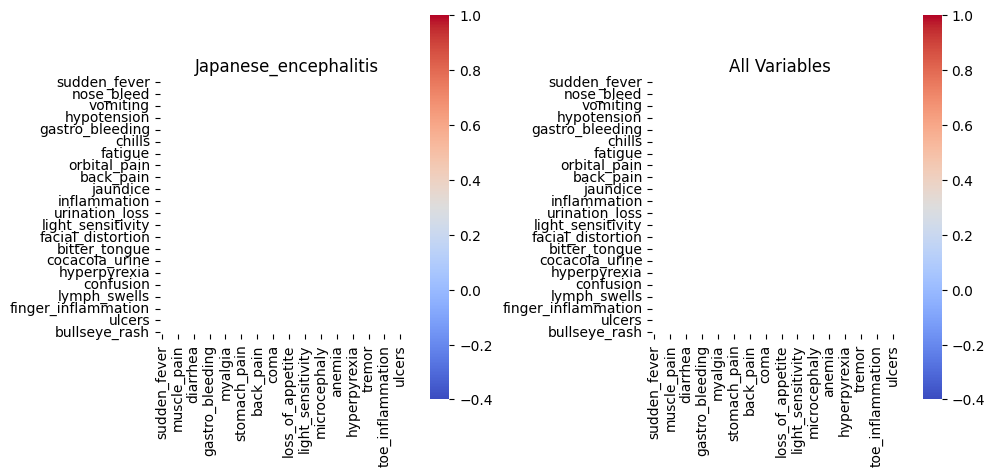

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for all variables
corr_matrix = train_df.drop(columns='prognosis').corr()

# Set the correlation level to filter the correlation matrix
level = -0.4

# Loop over each unique diagnosis in the 'prognosis' column
for prognosis in train_df['prognosis'].unique():
    # Filter the dataset to include only the current diagnosis
    data = train_df.query("prognosis == @prognosis")

    # Calculate the correlation matrix for the current diagnosis
    data_corr_matrix = data.drop(columns='prognosis').corr()

    # Filter the correlation matrices based on the correlation level
    mask = data_corr_matrix < level
    corr_matrix_filt = corr_matrix[mask]
    data_corr_matrix_filt = data_corr_matrix[mask]

    # Plot the correlation matrices using seaborn's heatmap function
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    sns.heatmap(data_corr_matrix_filt, cmap='coolwarm', vmin=-0.4, vmax=1, ax=ax[0], square=True)
    ax[0].set_title(f"{prognosis}")

    sns.heatmap(corr_matrix_filt, cmap='coolwarm',vmin=-0.4, vmax=1, ax=ax[1],square=True)
    ax[1].set_title('All Variables')

plt.tight_layout()
plt.show()


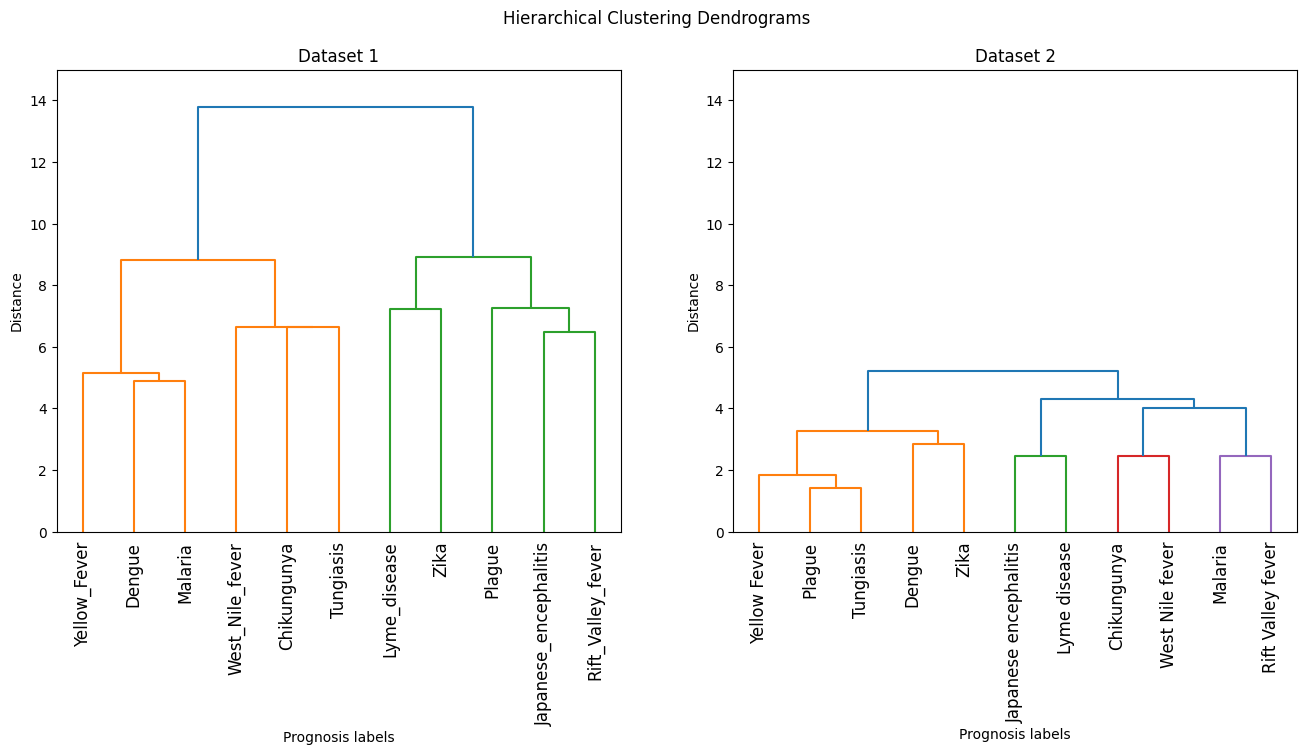

In [212]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def process_dataset(file_path):
    df = pd.read_csv(file_path)
    enc = OrdinalEncoder()
    df['prognosis'] = enc.fit_transform(df[['prognosis']])
    one_hot_enc = OneHotEncoder()
    df_encoded = one_hot_enc.fit_transform(df)
    unique_prognosis = np.unique(df['prognosis'])
    clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
    clustering.fit(df_encoded[unique_prognosis].toarray())
    prognosis_labels = enc.inverse_transform(unique_prognosis.reshape(-1, 1)).ravel()
    return clustering, prognosis_labels

def plot_dendrogram(model, labels, ax, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, labels=labels, ax=ax, **kwargs)

# Process the two datasets
clustering_1, prognosis_labels_1 = process_dataset('data/train.csv')
clustering_2, prognosis_labels_2 = process_dataset('data/trainn.csv')

# Plot the dendrograms side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
fig.suptitle('Hierarchical Clustering Dendrograms')

# Plot the first dendrogram in the left subplot
ax1.set_title('Dataset 1')
plot_dendrogram(clustering_1, labels=prognosis_labels_1, truncate_mode='level', p=5, ax=ax1)
ax1.set_xlabel("Prognosis labels")
ax1.set_ylabel("Distance")
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 15)

# Plot the second dendrogram in the right subplot
ax2.set_title('Dataset 2')
plot_dendrogram(clustering_2, labels=prognosis_labels_2, truncate_mode='level', p=5, ax=ax2)
ax2.set_xlabel("Prognosis labels")
ax2.set_ylabel("Distance")
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylim(0, 15)

plt.show()


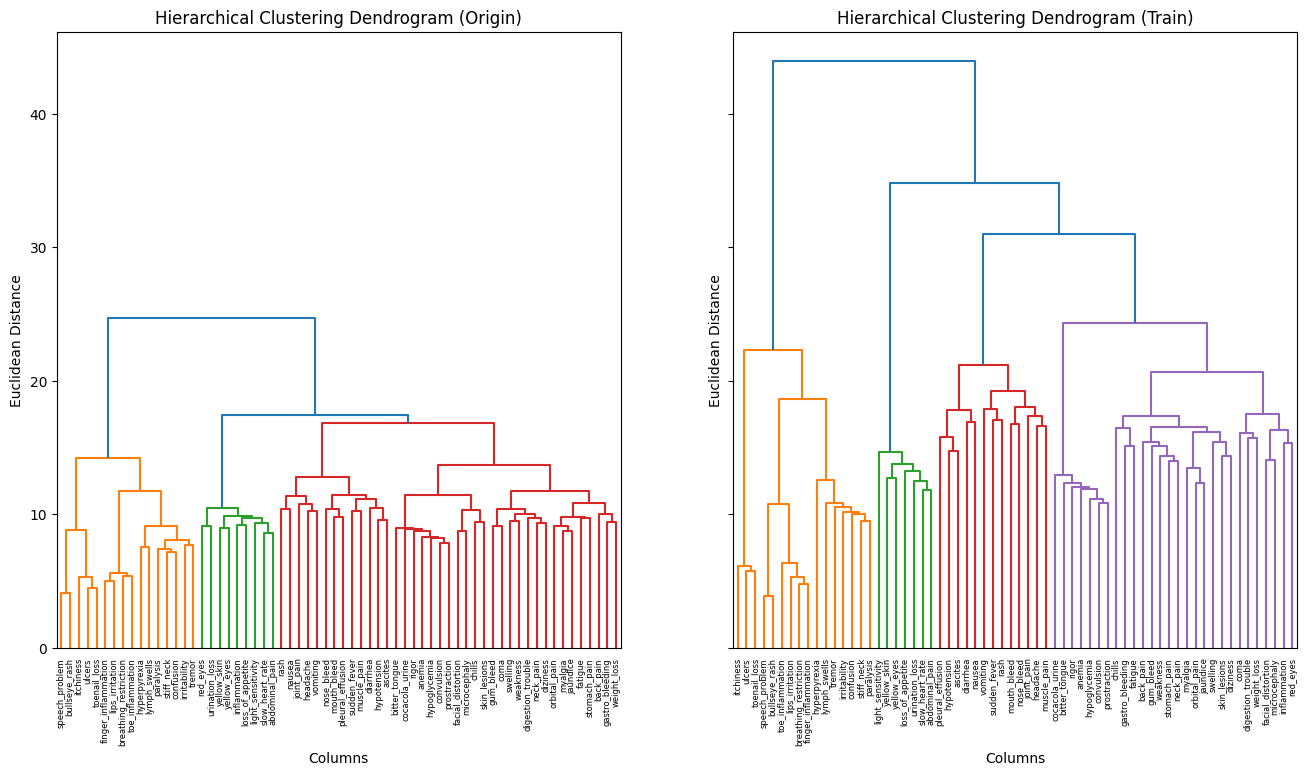

In [193]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(df, ax, title):
    columns_to_cluster = df.columns.drop(['id', 'prognosis'], errors='ignore')
    df_transposed = df[columns_to_cluster].transpose()
    
    # Generate the linkage matrix
    linkage_matrix = linkage(df_transposed, method='ward')
    
    # Plot the dendrogram
    dendrogram(linkage_matrix, labels=df_transposed.index, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Euclidean Distance')

origin_df = pd.read_csv('data/trainn.csv')
train_df = pd.read_csv('data/train.csv').drop(columns='id')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # Add sharey=True

plot_dendrogram(origin_df, ax1, 'Hierarchical Clustering Dendrogram (Origin)')
plot_dendrogram(train_df, ax2, 'Hierarchical Clustering Dendrogram (Train)')

plt.show()


In [222]:
## How good are we at determing prognosis cluster 1 vs cluster 2?

temp_train_df = read_csv('data/train.csv')

cluster_2 = ['Lyme_disease', 'Zika', 'Plague', 'Japanese_encephalitis', 'Rift_Valley_fever']
cluster_1 = [col for col in train_df.prognosis.unique() if col not in cluster_2]


NameError: name 'read_csv' is not defined

In [221]:
cluster_1

[3.0, 7.0, 10.0, 6.0, 8.0, 4.0, 0.0, 5.0, 1.0, 9.0, 2.0]